In [195]:
import numpy as np
from sklearn import svm
import pandas as pd

In [196]:
ps = {
    "kernel": "rbf",
    "C": 1.0,
    "gamma": "scale"
}

In [197]:
clf = svm.SVC()

In [199]:
class Dataset:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.x_train = X
        self.y_train = y
        self.x_test = X
        self.y_test = y        
    
    def split(self, percentage):
        idx = np.arange(len(self.X))
        np.random.shuffle(idx)
        
        sX = self.X[idx]
        sy = self.y[idx]
        
        n_train = int(len(self.X) * percentage)
        self.x_train = sX[:n_train]
        self.y_train = sy[:n_train]
        self.x_test = sX[n_train:]
        self.y_test = sy[n_train:]
    
    def __len__(self):
        return len(self.y)
    
    def __repr__(self):
        cls = self.__class__.__name__
        n = len(self.y)
        num_features = self.X.shape[1]
        return f'{cls}(samples={n}, features={num_features})'

In [200]:
class Learner:
    def __init__(self, name, model, param):
        self.name = name
        self.model = model
        self.params = param
        self.data = None
    
    def load_data(self, X, y):
        self.data = Dataset(X, y)
    
    def train_model(self):
        if self.data == None:
            print("Dataset has not been set.")
        else:
            self.model.fit(self.data.x_train, self.data.y_train)            
    
    def eval_model(self):
        pass
    
    def __repr__(self):
        cls = self.__class__.__name__
        return f'{cls}(model={self.name!r})'

In [170]:
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([0, 0, 1, 1])

In [201]:
df = pd.read_csv("iris.csv")

In [158]:
feat = ["sepal_length",	"sepal_width",	"petal_length",	"petal_width"]
targ = "species"

In [202]:
# df.species = pd.Categorical(df.species)
df[['classes']] = df[[targ]].apply(lambda col:pd.Categorical(col).codes)


In [203]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,classes
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [205]:
df["classes"].to_numpy().ravel().shape

(150,)

In [206]:
df['classes'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [207]:
X = df.iloc[:, 0:-2].copy().to_numpy()
y = df.iloc[:,-1].copy().to_numpy()

In [208]:
d = Dataset(X, y)

In [209]:
d.split(0.8)

In [106]:
len(d)

150

In [210]:
l = Learner("SVM", clf, [])

In [211]:
l.load_data(X,y)

In [212]:
l.train_model()

In [213]:
l.model.predict(d.x_test)

array([2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 2, 0, 0, 0], dtype=int8)

In [111]:
d.y_test

array([1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 0, 1, 2], dtype=int8)

In [97]:
idx = np.arange(len(y))
np.random.shuffle(idx)

In [225]:
x0_min = min(X[:,0]) - 1
x0_max = max(X[:,0]) + 1
x1_min = min(X[:,1]) - 1
x1_max = max(X[:,1]) + 1
x2_min = min(X[:,2]) - 1
x2_max = max(X[:,2]) + 1
x3_min = min(X[:,3]) - 1
x3_max = max(X[:,3]) + 1

In [229]:
x0 = np.linspace(x0_min, x0_max, num=500)
x1 = np.linspace(x1_min, x1_max, num=500)
x2 = np.linspace(x2_min, x2_max, num=500)
x3 = np.linspace(x3_min, x3_max, num=500)

In [233]:
gX = np.array([x0, x1, x2, x3]).T

In [235]:
gy = l.model.predict(gX)

In [247]:
gy = np.expand_dims(gy, axis=1)

In [244]:
np.array([[1, 2], [3, 4], [5, 6]]).shape

(3, 2)

In [250]:
dt = np.concatenate((gX, gy), axis=1)

In [252]:
gdf = pd.DataFrame(dt, columns=['x1', 'x2', 'x3', 'x4', 'cls'])

<Axes: xlabel='x1', ylabel='x2'>

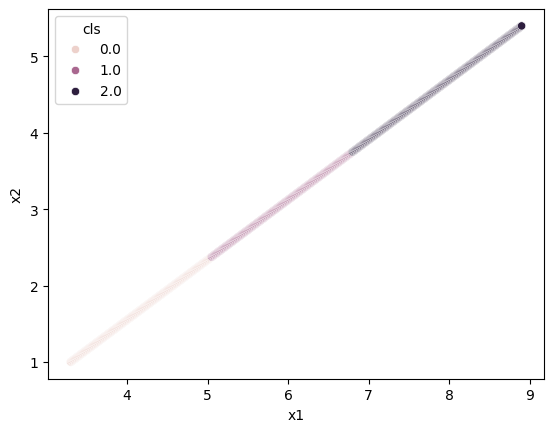

In [253]:
import seaborn as sns
sns.scatterplot(data=gdf, x='x1', y='x2', hue='cls')

In [142]:
import learner_module
import pandas as pd

In [143]:
l = learner_module.classification_algorithms

In [146]:
l.keys()

dict_keys(['LR', 'DTC', 'RFC', 'GBC', 'KNN', 'LSVM', 'Q-SVM', 'C-SVM', 'RBF-SVM', 'GNB', 'MNB', 'MLP', 'KMC', 'GMM'])

In [ ]:
for k,v in learner_module.classification_algorithms.items():
    print(v)

In [6]:
df = pd.DataFrame.from_dict(learner_module.classification_algorithms)

In [8]:
df.T

,long_name,function,parameters
LR,Logistic Regression,<class 'sklearn.linear_model._logistic.Logisti...,"[penalty, C, solver, max_iter]"
DTC,Decision Tree Classifier,<class 'sklearn.tree._classes.DecisionTreeClas...,"[criterion, max_depth, min_samples_split, min_..."
RFC,Random Forest Classifier,<class 'sklearn.ensemble._forest.RandomForestC...,"[n_estimators, criterion, max_depth, min_sampl..."
GBC,Gradient Boosting Classifier,<class 'sklearn.ensemble._gb.GradientBoostingC...,"[n_estimators, learning_rate, max_depth, subsa..."
KNN,K-Nearest Neighbors Classifier,<class 'sklearn.neighbors._classification.KNei...,"[n_neighbors, weights, algorithm, p]"
LSVM,Linear Support Vector Machine,<class 'sklearn.svm._classes.SVC'>,"[kernel='linear', C, max_iter]"
Q-SVM,Quadratic Support Vector Machine,<class 'sklearn.svm._classes.SVC'>,"[kernel='poly', degree=2, C, gamma]"
C-SVM,Cubic Support Vector Machine,<class 'sklearn.svm._classes.SVC'>,"[kernel='poly', degree=3, C, gamma]"
RBF-SVM,Radial Basis Function Support Vector Machine,<class 'sklearn.svm._classes.SVC'>,"[kernel='rbf', C, gamma]"
GNB,Gaussian Naive Bayes,<class 'sklearn.naive_bayes.GaussianNB'>,[var_smoothing]


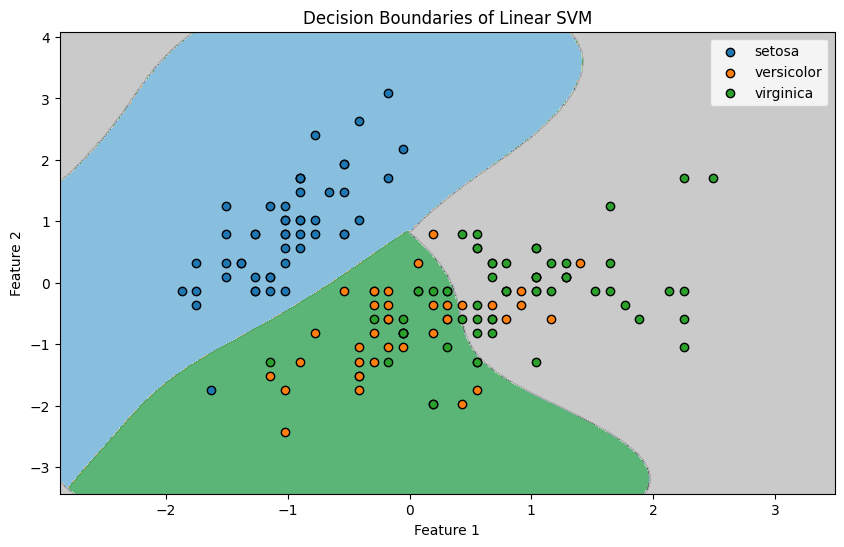

In [275]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

def plot_decision_boundaries(model, X, y, feature_idx, class_names):
    # Select the two features for visualization
    X_selected = X[:, feature_idx]
    
    # Standardize the selected features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    # Create a mesh grid
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict class probabilities for the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.tab20c)

    # Scatter plot of the original data
    for class_value, class_name in enumerate(class_names):
        plt.scatter(
            X_scaled[y == class_value, 0],
            X_scaled[y == class_value, 1],
            label=class_name,
            edgecolor="k"
        )

    plt.xlabel(f"Feature {feature_idx[0] + 1}")
    plt.ylabel(f"Feature {feature_idx[1] + 1}")
    plt.title("Decision Boundaries of Linear SVM")
    plt.legend()
    plt.show()

# Example usage
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data  # All 4 features
y = iris.target  # Target labels
class_names = iris.target_names

# Train a Linear SVM model on two selected features (e.g., feature 0 and 1)
features_to_visualize = [0, 1]
X_selected_features = X[:, features_to_visualize]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected_features)

svm_model = SVC(kernel="rbf")
svm_model.fit(X_scaled, y)

# Plot decision boundaries
plot_decision_boundaries(svm_model, X, y, features_to_visualize, class_names)


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data =
     go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]],
        colorscale='Electric',
    ))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import sklearn.datasets as db
import numpy as np
ks = ["data", "target", "feature_names", "target_names"]

In [307]:
d = db.load_iris()
data = d["data"]
target = d["target"]
fnames = d["feature_names"]
cls = d["target_names"]

In [308]:
cls

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

def get_dataset_df(dataset_loader):
    dataset = dataset_loader()
    X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
    y = pd.Series(dataset['target'], name='target')
    target_names = {index: name for index, name in enumerate(dataset['target_names'])}
    y = y.map(target_names)
    df = pd.concat([X, y], axis=1)
    return df


In [313]:
target_names = {index: name for index, name in enumerate(cls)}
y = pd.Series(d['target'], name='target')
y = y.map(target_names)

In [318]:
load_sklearn_dataset_as_dataframe(db.load_digits)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [325]:
import sklearn.datasets as skds

In [326]:
sk_datasets = {"Iris": skds.load_iris, "Wine": skds.load_wine, "Digits": skds.load_digits, "Cancer": skds.load_breast_cancer}


In [329]:
for i, (k, v) in enumerate(sk_datasets.items()):
    print(f"{i} ---- {k} ----- {v}")

0 ---- Iris ----- <function load_iris at 0x7f2d19bda0c0>
1 ---- Wine ----- <function load_wine at 0x7f2d19bd9f80>
2 ---- Digits ----- <function load_digits at 0x7f2d19bda340>
3 ---- Cancer ----- <function load_breast_cancer at 0x7f2d19bda200>
